In [1]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_closefull.csv

--2023-03-08 14:40:11--  https://lazyprogrammer.me/course_files/sp500_closefull.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18464866 (18M) [text/csv]
Saving to: â€˜sp500_closefull.csvâ€™

     0K .......... .......... .......... .......... ..........  0%  320K 56s
    50K .......... .......... .......... .......... ..........  0%  311K 57s
   100K .......... .......... .......... .......... ..........  0%  316K 57s
   150K .......... .......... .......... .......... ..........  1%  318K 56s
   200K .......... .......... .......... .......... ..........  1% 23.5M 45s
   250K .......... .......... .......... .......... ..........  1% 1.24M 40s
   300K .......... .......... .......... .......... ..........  1%  423K 40s
   350K .......... .......... .......

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Read CSV

In [3]:
df0 = pd.read_csv('sp500_closefull.csv', index_col=0, parse_dates=True)
#df0 = pd.read_csv('BTCUSDT-2000000-tp-20-sl-20facto 1.csv')
df0.dropna(axis=0, how='all', inplace=True)
df0.dropna(axis=1, how='any', inplace=True)

In [4]:
df0

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.800000,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.200000,3.510000,238.580002,30.242558
2010-01-05,24.580000,13.910000,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.110000,3.615000,239.610001,29.851370
2010-01-06,24.420000,13.270000,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.380000,3.695000,234.669998,29.916569
2010-01-07,24.530001,13.550000,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.820000,3.651250,237.250000,29.627834
2010-01-08,24.660000,13.330000,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.770000,3.643750,238.919998,29.534695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,41.849998,81.470001,86.779999,446.019989,37.029999,32.810001,21.910000,13.450000,304.549988,156.500000,...,28.200001,122.910004,59.419998,176.559998,33.770000,127.160004,18.860001,16.959999,369.160004,28.400000
2018-12-24,40.279999,79.120003,84.949997,434.890015,36.500000,32.299999,20.980000,12.660000,294.160004,151.910004,...,28.150000,121.330002,57.070000,173.539993,33.200001,123.279999,17.950001,16.750000,361.769989,27.590000
2018-12-26,42.470001,83.800003,89.650002,461.980011,40.700001,33.889999,22.709999,14.170000,313.929993,161.839996,...,30.129999,130.839996,59.330002,181.190002,34.400002,130.839996,18.910000,17.820000,381.230011,28.309999


# Prepare DataFrame

In [5]:
df_returns = pd.DataFrame()
for name in df0.columns:
  df_returns[name] = np.log(df0[name]).diff()

C:\Users\samim\AppData\Local\Temp\ipykernel_13364\1269682969.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_returns[name] = np.log(df0[name]).diff()
C:\Users\samim\AppData\Local\Temp\ipykernel_13364\1269682969.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_returns[name] = np.log(df0[name]).diff()
C:\Users\samim\AppData\Local\Temp\ipykernel_13364\1269682969.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

In [6]:
df_returns

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,...,-0.011793,-0.004286,-0.003333,-0.013723,0.046560,-0.006793,-0.005939,0.029476,0.004308,-0.013019
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,...,0.014134,-0.001746,-0.010067,0.001808,0.036075,-0.004555,0.017711,0.021889,-0.020832,0.002182
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,...,0.022551,-0.004447,-0.013583,0.004260,0.013536,-0.001777,0.028207,-0.011911,0.010934,-0.009698
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,...,-0.033133,0.001485,0.009075,0.000817,-0.018454,0.024841,-0.003166,-0.002056,0.007014,-0.003149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,-0.015177,-0.035451,-0.005974,-0.030602,-0.346415,-0.018122,-0.027017,-0.011826,-0.027528,-0.030210,...,-0.032103,-0.038466,-0.006375,-0.007055,-0.005610,-0.009003,-0.060188,-0.042142,-0.006776,-0.010508
2018-12-24,-0.038237,-0.029269,-0.021313,-0.025271,-0.014416,-0.015666,-0.043374,-0.060532,-0.034711,-0.029768,...,-0.001775,-0.012938,-0.040352,-0.017253,-0.017023,-0.030988,-0.049453,-0.012459,-0.020222,-0.028936
2018-12-26,0.052943,0.057467,0.053850,0.060428,0.108916,0.048053,0.079236,0.112680,0.065046,0.063320,...,0.067974,0.075461,0.038837,0.043138,0.035507,0.059517,0.052101,0.061923,0.052394,0.025762


# Split Test and Train

In [7]:
# split into train and test
Ntest = 1000
train_data = df_returns.iloc[:-Ntest]
test_data = df_returns.iloc[-Ntest:]

# Column choice

In [8]:
feats = ['AAPL', 'MSFT', 'AMZN']

# Class

In [9]:
class Env:
  def __init__(self, df):
    self.df = df
    self.n = len(df)
    self.current_idx = 0
    self.action_space = [0, 1, 2] # BUY, SELL, HOLD
    self.invested = 0

    self.states = self.df[feats].to_numpy()
    self.rewards = self.df['SPY'].to_numpy()

  def reset(self):
    self.current_idx = 0
    return self.states[self.current_idx]

  def step(self, action):
    # need to return (next_state, reward, done)

    self.current_idx += 1
    if self.current_idx >= self.n:
      raise Exception("Episode already done")

    if action == 0: # BUY
      self.invested = 1
    elif action == 1: # SELL
      self.invested = 0
    
    # compute reward
    if self.invested:
      reward = self.rewards[self.current_idx]
    else:
      reward = 0

    # state transition
    next_state = self.states[self.current_idx]

    done = (self.current_idx == self.n - 1)
    return next_state, reward, done

In [10]:
class StateMapper:
  def __init__(self, env, n_bins=6, n_samples=10000):
    # first, collect sample states from the environment
    states = []
    done = False
    s = env.reset()
    self.D = len(s) # number of elements we need to bin
    states.append(s)
    for _ in range(n_samples):
      a = np.random.choice(env.action_space)
      s2, _, done = env.step(a)
      states.append(s2)
      if done:
        s = env.reset()
        states.append(s)

    # convert to numpy array for easy indexing
    states = np.array(states)

    # create the bins for each dimension
    self.bins = []
    for d in range(self.D):
      column = np.sort(states[:,d])

      # find the boundaries for each bin
      current_bin = []
      for k in range(n_bins):
        boundary = column[int(n_samples / n_bins * (k + 0.5))]
        current_bin.append(boundary)

      self.bins.append(current_bin)


  def transform(self, state):
    x = np.zeros(self.D)
    for d in range(self.D):
      x[d] = int(np.digitize(state[d], self.bins[d]))
    return tuple(x)


  def all_possible_states(self):
    list_of_bins = []
    for d in range(self.D):
      list_of_bins.append(list(range(len(self.bins[d]) + 1)))
    # print(list_of_bins)
    return itertools.product(*list_of_bins)

In [11]:
class Agent:
  def __init__(self, action_size, state_mapper):
    self.action_size = action_size
    self.gamma = 0.8  # discount rate
    self.epsilon = 0.1
    self.learning_rate = 1e-1
    self.state_mapper = state_mapper

    # initialize Q-table randomly
    self.Q = {}
    for s in self.state_mapper.all_possible_states():
      s = tuple(s)
      for a in range(self.action_size):
        self.Q[(s,a)] = np.random.randn()

  def act(self, state):
    if np.random.rand() <= self.epsilon:
      return np.random.choice(self.action_size)

    s = self.state_mapper.transform(state)
    act_values = [self.Q[(s,a)] for a in range(self.action_size)]
    return np.argmax(act_values)  # returns action

  def train(self, state, action, reward, next_state, done):
    s = self.state_mapper.transform(state)
    s2 = self.state_mapper.transform(next_state)

    if done:
      target = reward
    else:
      act_values = [self.Q[(s2,a)] for a in range(self.action_size)]
      target = reward + self.gamma * np.amax(act_values)

    # Run one training step
    self.Q[(s,action)] += self.learning_rate * (target - self.Q[(s,action)])

# Functions

In [12]:
def play_one_episode(agent, env, is_train):
  state = env.reset()
  done = False
  total_reward = 0
  while not done:
    action = agent.act(state)
    next_state, reward, done = env.step(action)
    total_reward += reward
    if is_train:
      agent.train(state, action, reward, next_state, done)
    state = next_state

  return total_reward

In [13]:
agent

NameError: name 'agent' is not defined

# Main

In [14]:
num_episodes = 500

In [15]:
train_env = Env(train_data)
test_env = Env(test_data)

In [18]:
train_env.__dict__

{'df':                 CSCO       UAL      TROW      ISRG      PRGO       TPR  \
 Date                                                                     
 2010-01-04       NaN       NaN       NaN       NaN       NaN       NaN   
 2010-01-05 -0.004465  0.083163  0.011151 -0.004512 -0.039429  0.012045   
 2010-01-06 -0.006531 -0.047102 -0.015757  0.014405 -0.012713  0.019402   
 2010-01-07  0.004494  0.020881 -0.000739 -0.003759 -0.008127  0.000534   
 2010-01-08  0.005286 -0.016369 -0.003889 -0.005519 -0.005543 -0.005886   
 ...              ...       ...       ...       ...       ...       ...   
 2015-01-02 -0.007577 -0.008256 -0.001165 -0.006392 -0.003176 -0.006678   
 2015-01-05 -0.020121 -0.002868 -0.023239 -0.021541 -0.010376 -0.015668   
 2015-01-06 -0.000370 -0.024020 -0.017821  0.010482 -0.001882 -0.011776   
 2015-01-07  0.009200  0.014603  0.014594  0.005468  0.016569  0.030388   
 2015-01-08  0.007663  0.016797  0.011784  0.019629  0.022570  0.025071   
 
                 

In [16]:
train_data

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,...,-0.011793,-0.004286,-0.003333,-0.013723,0.046560,-0.006793,-0.005939,0.029476,0.004308,-0.013019
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,...,0.014134,-0.001746,-0.010067,0.001808,0.036075,-0.004555,0.017711,0.021889,-0.020832,0.002182
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,...,0.022551,-0.004447,-0.013583,0.004260,0.013536,-0.001777,0.028207,-0.011911,0.010934,-0.009698
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,...,-0.033133,0.001485,0.009075,0.000817,-0.018454,0.024841,-0.003166,-0.002056,0.007014,-0.003149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-02,-0.007577,-0.008256,-0.001165,-0.006392,-0.003176,-0.006678,-0.004093,0.010898,-0.000231,0.035312,...,-0.000913,-0.001181,0.001851,0.010238,-0.003829,0.001385,-0.006057,-0.014987,-0.002324,0.000825
2015-01-05,-0.020121,-0.002868,-0.023239,-0.021541,-0.010376,-0.015668,-0.037778,-0.047620,-0.006950,-0.016715,...,-0.008562,-0.018227,-0.011157,-0.007580,-0.029289,-0.012284,-0.011690,-0.024057,-0.026215,-0.023373
2015-01-06,-0.000370,-0.024020,-0.017821,0.010482,-0.001882,-0.011776,-0.020655,-0.015149,-0.011848,-0.030792,...,-0.003692,-0.016816,-0.012418,-0.004345,-0.006984,-0.016833,-0.017523,-0.016677,-0.015662,-0.000282


In [ ]:
action_size = len(train_env.action_space)
state_mapper = StateMapper(train_env)
agent = Agent(action_size, state_mapper)

In [ ]:
train_rewards = np.empty(num_episodes)
test_rewards = np.empty(num_episodes)

# Result

In [ ]:
for e in range(num_episodes):
  r = play_one_episode(agent, train_env, is_train=True)
  train_rewards[e] = r

  # test on the test set
  tmp_epsilon = agent.epsilon
  agent.epsilon = 0.
  tr = play_one_episode(agent, test_env, is_train=False)
  agent.epsilon = tmp_epsilon
  test_rewards[e] = tr

  print(f"eps: {e + 1}/{num_episodes}, train: {r:.5f}, test: {tr:.5f}")

eps: 1/500, train: 0.17432, test: -0.02462
eps: 2/500, train: 0.37401, test: -0.04968
eps: 3/500, train: 0.19343, test: 0.16268
eps: 4/500, train: 0.30016, test: -0.05417
eps: 5/500, train: 0.43478, test: -0.04200
eps: 6/500, train: 0.39544, test: 0.06487
eps: 7/500, train: 0.45522, test: 0.02595
eps: 8/500, train: 0.31319, test: 0.00396
eps: 9/500, train: 0.07127, test: 0.05717
eps: 10/500, train: 0.48963, test: 0.13232
eps: 11/500, train: 0.38161, test: -0.09868
eps: 12/500, train: 0.04224, test: 0.13195
eps: 13/500, train: 0.35320, test: 0.03676
eps: 14/500, train: 0.27769, test: -0.03054
eps: 15/500, train: 0.40158, test: -0.14522
eps: 16/500, train: 0.38251, test: -0.10042
eps: 17/500, train: 0.31626, test: -0.06074
eps: 18/500, train: 0.24349, test: 0.08160
eps: 19/500, train: 0.13293, test: -0.05147
eps: 20/500, train: 0.21604, test: 0.09362
eps: 21/500, train: 0.36446, test: -0.09481
eps: 22/500, train: 0.27907, test: 0.02748
eps: 23/500, train: 0.36629, test: 0.03604
eps: 24/5

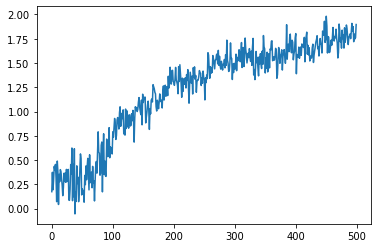

In [ ]:
plt.plot(train_rewards)

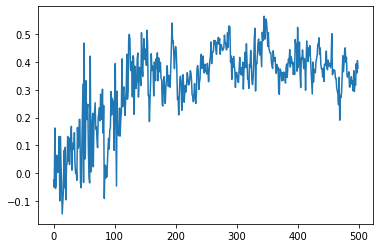

In [ ]:
plt.plot(test_rewards)